In [1]:
# Objective: To explore the relationship between various medical and demographic factors among patients
#          : To predict lifestyle factors lead to patients developing diabetes

In [1]:
# to import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [5]:
df = pd.read_csv("C:/Users/miche/Desktop/machine_learning/diabetes_prediction_dataset.csv")

In [7]:
# to display variables in dataset
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [9]:
# to check for missing values
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [11]:
# Dataset contains 100,000 patients' data
len(df)

100000

In [13]:
# to see distribution of target variable = 'diabetes'
sns.countplot(data=df, x='diabetes')
plt.title('Distribution of diabetic population');

In [15]:
df['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [17]:
# 8.5% of patients have diabetes
pd.DataFrame(100*(df['diabetes'].value_counts())/len(df))

,count
diabetes,
0,91.5
1,8.5


In [19]:
# to check data types of all variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [21]:
sns.boxplot(data=df, y='age');

In [23]:
# the average age of patient is 40 years
df['age'].describe()

count    100000.000000
mean         41.885856
std          22.516840
min           0.080000
25%          24.000000
50%          43.000000
75%          60.000000
max          80.000000
Name: age, dtype: float64

In [25]:
# to split the years into different categories, using def custom function
def age_categories(s):
    if  0 <= s <= 20:
        return "1 to 20 "
    elif 21 <= s <= 39:
        return "21 to 35"
    elif 36 <= s <= 50:
        return "36 to 50"
    elif 51 <= s <= 65:
        return "51 to 65"
    elif 66 <= s:
        return "above 66"

In [27]:
# to .apply() custom function
df['age_categories'] = df['age'].apply(age_categories)

In [29]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_categories
0,Female,80.0,0,1,never,25.19,6.6,140,0,above 66
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,51 to 65
2,Male,28.0,0,0,never,27.32,5.7,158,0,21 to 35
3,Female,36.0,0,0,current,23.45,5.0,155,0,21 to 35
4,Male,76.0,1,1,current,20.14,4.8,155,0,above 66


In [31]:
df['age_categories'].unique()

array(['above 66', '51 to 65', '21 to 35', '1 to 20 ', '36 to 50'],
      dtype=object)

In [33]:
age_categories_order = ['1 to 20',
                       '21 to 35',
                       '36 to 50',
                       '51 to 65',
                      'above 66']

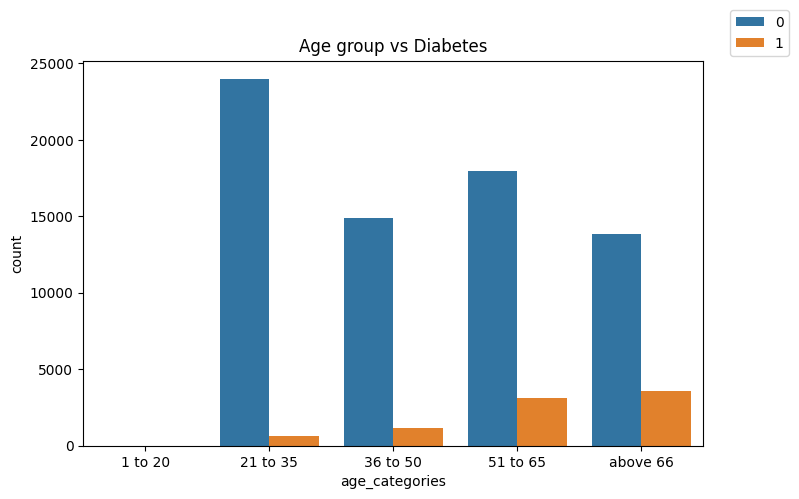

In [45]:
# the incidence of patients' developing diabetes increases with age
plt.figure(figsize=(8,5), dpi=100)
sns.countplot(data=df, x='age_categories', order=age_categories_order, hue='diabetes')
plt.legend(bbox_to_anchor=(1.15, 1.15))
plt.title('Age group vs Diabetes')
plt.show()

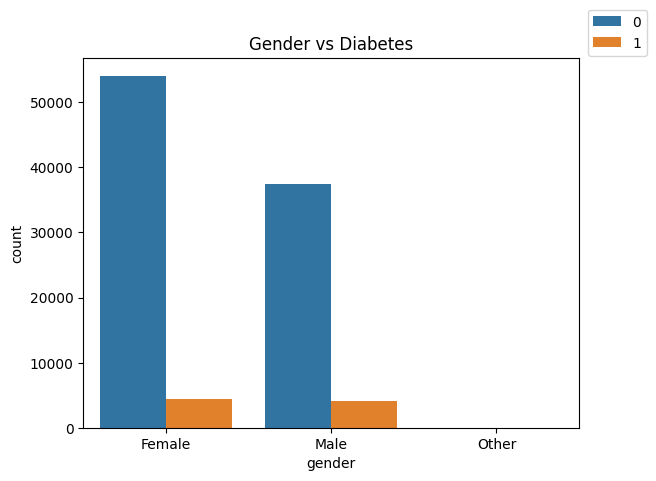

In [47]:
# Females are more likely to get diabetes compared to males
sns.countplot(data=df, x='gender', hue='diabetes')
plt.title('Gender vs Diabetes')
plt.legend(bbox_to_anchor=(1.15,1.15))
plt.show()

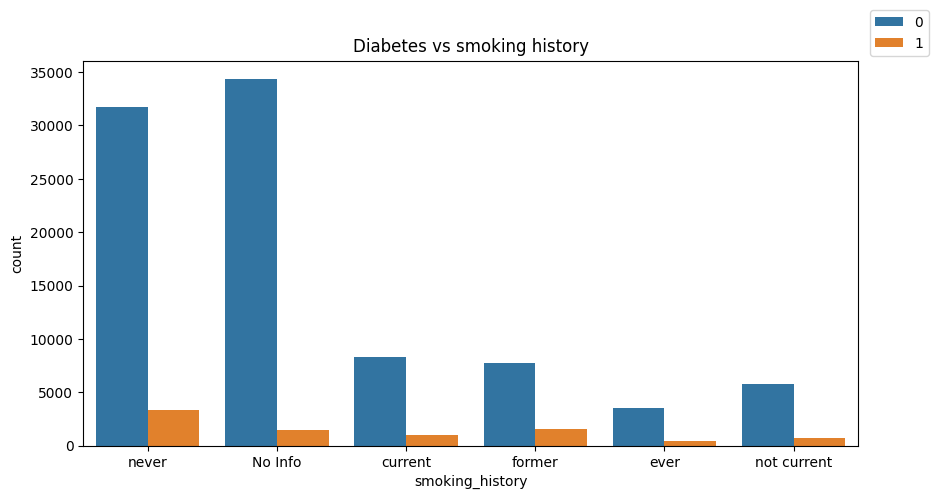

In [49]:
plt.figure(figsize=(10,5), dpi=100)
sns.countplot(data=df, x ='smoking_history', hue='diabetes')
plt.legend(bbox_to_anchor=(1.1,1.15))
plt.title('Diabetes vs smoking history')
plt.show()

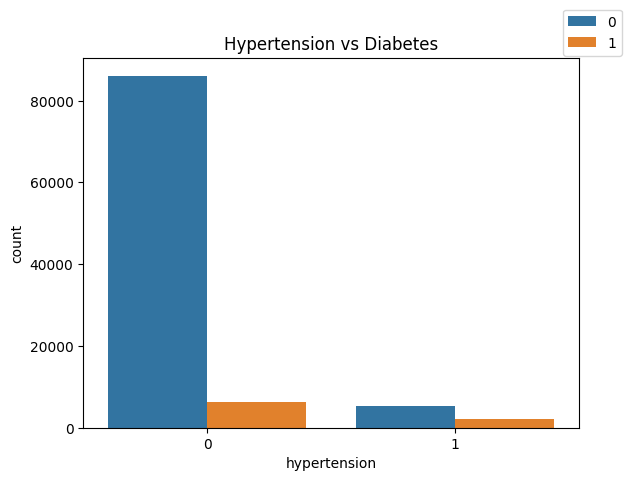

In [51]:
# Diabetic patients are likely non-hypertensive
sns.countplot(data=df, x='hypertension', hue='diabetes')
plt.title('Hypertension vs Diabetes')
plt.legend(bbox_to_anchor=(1.1, 1.15))
plt.show()

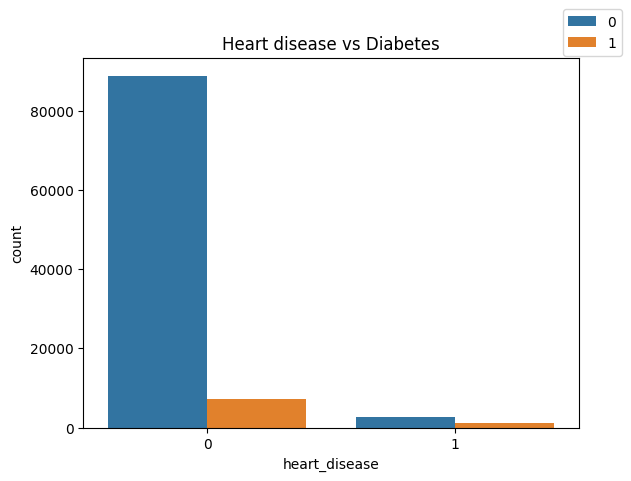

In [53]:
# Diabetic patients are not likely to suffer from heart disease
sns.countplot(data=df, x='heart_disease', hue='diabetes')
plt.title('Heart disease vs Diabetes')
plt.legend(bbox_to_anchor=(1.1, 1.15))
plt.show()

In [55]:
# to remove unimportant variables before machine learning algorithm
df = df.drop('age_categories', axis=1)

In [57]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [59]:
X = df.drop('diabetes', axis=1)

In [61]:
# to convert categorical variables in X into dummy variables before predictive modelling
X = pd.get_dummies(X, drop_first=True)

In [63]:
y = df['diabetes']

In [65]:
from sklearn.model_selection import train_test_split

In [67]:
from sklearn.preprocessing import StandardScaler

In [69]:
# testing data = 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [71]:
scaler = StandardScaler()

In [73]:
scaled_X_train = scaler.fit_transform(X_train)

In [75]:
scaled_X_test = scaler.transform(X_test)

In [77]:
# to use oversampling via SMOTE as target variables 'diabetes' is highly imbalanced
from imblearn.over_sampling import SMOTE

In [79]:
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions y_train dataset:  (80000,)
Number transactions y_test dataset:  (20000,)


In [81]:
# to Oversample 'diabetes' in y_train set
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE()
X_train_res, y_train_res = sm.fit_resample(scaled_X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 6834
Before OverSampling, counts of label '0': 73166 

After OverSampling, the shape of train_X: (146332, 13)
After OverSampling, the shape of train_y: (146332,) 

After OverSampling, counts of label '1': 73166
After OverSampling, counts of label '0': 73166


In [83]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [85]:
from xgboost import XGBClassifier

In [87]:
from sklearn.tree import DecisionTreeClassifier

In [89]:
rf = RandomForestClassifier()

In [91]:
rf.fit(X_train_res, y_train_res)

RandomForestClassifier()

In [93]:
# to predict on the X testing set
rf_pred = rf.predict(scaled_X_test)

In [95]:
# to print out prediction for the random forest model
rf_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [97]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, f1_score

In [101]:
print(confusion_matrix(y_test,rf_pred))
print('\n')
print(classification_report(y_test,rf_pred)) # Random Forest = 96% accuracy

[[17937   397]
 [  438  1228]]


              precision    recall  f1-score   support

           0       0.98      0.98      0.98     18334
           1       0.76      0.74      0.75      1666

    accuracy                           0.96     20000
   macro avg       0.87      0.86      0.86     20000
weighted avg       0.96      0.96      0.96     20000



In [103]:
# to do prediction on the RF training set
rf_train_pred = rf.predict(X_train_res)

In [105]:
# to print first 10 prediction on random forest training set
rf_train_pred

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [109]:
# to compute the confusion matrix for training set, actual & predicted
print(confusion_matrix(y_train_res, rf_train_pred, normalize='true'))

[[9.99904327e-01 9.56728535e-05]
 [7.51715278e-04 9.99248285e-01]]


In [111]:
# Random Forest
# normalize = 'true' change figures all to percentages 
# True Negative (diabetic cases) = 97.97%
# True positive (diabetic cases) = 72.92%
print(confusion_matrix(y_test,rf_pred, normalize='true'))

[[0.97834624 0.02165376]
 [0.26290516 0.73709484]]


In [113]:
# Dataset is imbalanced, negative cases outweighing positive classes, therefore AUC needs to be computed
print("Test AUC RF", roc_auc_score(y_test,rf_pred))   
print("Train AUC RF", roc_auc_score(y_train_res,rf_train_pred))

Test AUC RF 0.8577205399450061
Train AUC RF 0.9995763059344503


In [52]:
# AUC for Random Forest prediction model = 85.45%

In [115]:
ada = AdaBoostClassifier()

In [117]:
ada.fit(X_train_res, y_train_res)

C:\Users\miche\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [119]:
# to do prediction on the Adaboost train set
ada_train_pred = ada.predict(X_train_res)

In [121]:
# to print first 10 prediction of Adaboost training set
ada_train_pred[:10]

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [123]:
print(confusion_matrix(y_train_res, rf_train_pred, normalize='true'))

[[9.99904327e-01 9.56728535e-05]
 [7.51715278e-04 9.99248285e-01]]


In [125]:
ada_pred = ada.predict(scaled_X_test)

In [127]:
ada_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [129]:
print(confusion_matrix(y_test,ada_pred))
print('\n')
print(classification_report(y_test,ada_pred))

[[17272  1062]
 [  295  1371]]


              precision    recall  f1-score   support

           0       0.98      0.94      0.96     18334
           1       0.56      0.82      0.67      1666

    accuracy                           0.93     20000
   macro avg       0.77      0.88      0.82     20000
weighted avg       0.95      0.93      0.94     20000



In [133]:
# Adaboost
# normalize = 'true' changes everything to percentages
# True Negative (Diabetic cases) = 94.72%
# True positive cases = 83.79%
print(confusion_matrix(y_test,ada_pred, normalize='true'))

[[0.94207483 0.05792517]
 [0.17707083 0.82292917]]


In [135]:
# Dataset is imbalanced, Negative cases outweighing positive cases, therefore AUC needs to be computed
print("Test AUC Adaboost", roc_auc_score(y_test,ada_pred))
print("Train AUC Adaboost", roc_auc_score(y_train_res, rf_train_pred))

Test AUC Adaboost 0.8825020026555402
Train AUC Adaboost 0.9995763059344503


In [63]:
# AUC for AdaBoost prediction model = 89.25%

In [137]:
gb = GradientBoostingClassifier()

In [139]:
gb.fit(X_train_res, y_train_res)

GradientBoostingClassifier()

In [141]:
gb_pred = gb.predict(scaled_X_test)

In [143]:
print(confusion_matrix(y_test,gb_pred))
print('\n')
print(classification_report(y_test,gb_pred)) # GB 96% accuracy

[[17821   513]
 [  374  1292]]


              precision    recall  f1-score   support

           0       0.98      0.97      0.98     18334
           1       0.72      0.78      0.74      1666

    accuracy                           0.96     20000
   macro avg       0.85      0.87      0.86     20000
weighted avg       0.96      0.96      0.96     20000



In [145]:
# Gradient Boost Classifier
# True Negative cases (Diabetic) = 97.20%
# True positives = 77.43%
print(confusion_matrix(y_test,gb_pred, normalize='true'))

[[0.9720192 0.0279808]
 [0.2244898 0.7755102]]


In [147]:
# Dataset is imbalanced, Negative cases outweighing positive cases, therefore AUC needs to be computed
print("Test AUC Gradient Boost", roc_auc_score(y_test,gb_pred))

Test AUC Gradient Boost 0.873764701691738


In [70]:
# Gradient Boost classifier AUC score = 87.31%

In [149]:
xg = XGBClassifier()

In [151]:
xg.fit(X_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [153]:
xg_pred = xg.predict(scaled_X_test)

In [155]:
print(confusion_matrix(y_test,xg_pred))
print('\n')
print(classification_report(y_test,xg_pred)) # XGBoost 97% accuracy

[[18206   128]
 [  523  1143]]


              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18334
           1       0.90      0.69      0.78      1666

    accuracy                           0.97     20000
   macro avg       0.94      0.84      0.88     20000
weighted avg       0.97      0.97      0.97     20000



In [157]:
# XG Boost Classifier
# True Negative (Diabetic) = 99.38%
# True positive cases = 68.60%
print(confusion_matrix(y_test,xg_pred, normalize ='true'))

[[0.99301844 0.00698156]
 [0.31392557 0.68607443]]


In [175]:
# Dataset is imbalanced, Negative cases outweighing positive cases, therefore AUC needs to be computed
print("Test AUC XG_Boost", roc_auc_score(y_test,xg_pred))

Test AUC XG_Boost 0.8395464327325782


In [77]:
# XG Boost classifier AUC score = 84.38%

In [177]:
dt = DecisionTreeClassifier()

In [179]:
dt.fit(X_train_res, y_train_res)

DecisionTreeClassifier()

In [181]:
dt_pred = dt.predict(scaled_X_test)

In [183]:
dt_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [185]:
print(confusion_matrix(y_test,dt_pred))
print('\n')
print(classification_report(y_test,dt_pred)) # Decision Tree 95% accuracy

[[17778   556]
 [  446  1220]]


              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18334
           1       0.69      0.73      0.71      1666

    accuracy                           0.95     20000
   macro avg       0.83      0.85      0.84     20000
weighted avg       0.95      0.95      0.95     20000



In [187]:
# Decision Tree 
# True negative (Diabetics) = 96.82%
# True positive cases = 73.17%
print(confusion_matrix(y_test,dt_pred, normalize='true'))

[[0.96967383 0.03032617]
 [0.26770708 0.73229292]]


In [189]:
# Dataset is imbalanced, Negative cases outweighing positive cases, therefore AUC needs to be computed
print("Test AUC Decision tree", roc_auc_score(y_test,dt_pred))

Test AUC Decision tree 0.8509833736047053


In [85]:
# Decision tree AUC score = 84.99%

In [86]:
# AUC for AdaBoost prediction model = 89.25%
# Among all the model, Adaboost has the highest AUC score at 89.25%

In [87]:
# AdaBoost classifier model should be used to identify predictors for Diabetic patients

In [191]:
ada.feature_importances_

array([0.1 , 0.02, 0.02, 0.06, 0.54, 0.26, 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  ])

In [193]:
pd.DataFrame(data = ada.feature_importances_, index= X.columns, columns=['Importance']).sort_values('Importance', ascending=False)

,Importance
HbA1c_level,0.54
blood_glucose_level,0.26
age,0.10
bmi,0.06
hypertension,0.02
heart_disease,0.02
gender_Male,0.00
gender_Other,0.00
smoking_history_current,0.00
smoking_history_ever,0.00


In [195]:
ada_imp = pd.DataFrame(data = ada.feature_importances_, index= X.columns, columns=['Importance']).sort_values('Importance', ascending=False)

C:\Users\miche\AppData\Local\Temp\ipykernel_7452\3217889844.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ada_imp, y=ada_imp.index, x='Importance', palette='magma')


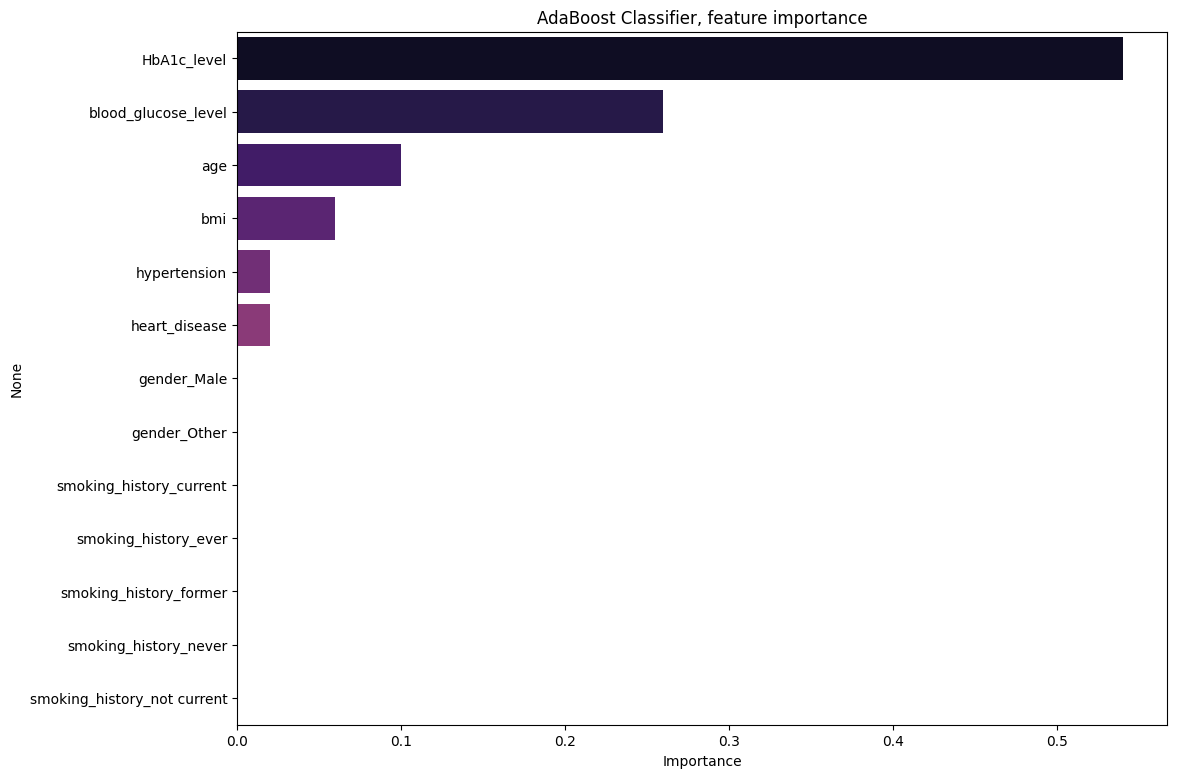

In [201]:
# Predictors for diabetic patients: HbA1c_level, blood_glucose_level, age, bmi, hypertension
plt.figure(figsize=(12,9), dpi=100)
sns.barplot(data=ada_imp, y=ada_imp.index, x='Importance', palette='magma')
plt.title('AdaBoost Classifier, feature importance')
plt.show()